#Importing required libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pymysql as ps
import warnings
warnings.filterwarnings('ignore')

#Establishing database connection(MySql)

In [3]:
conn = ps.connect(host='localhost',user='root',password='Yogesh@123',database='crime')


# Initiating cursor 
cursor = conn.cursor()

query='SELECT * FROM crime_data'

cursor.execute(query)

#Fetching data
data=cursor.fetchall()

# Converting data to dataframe 
crime_df1 = pd.DataFrame(data)

column_names = ['DR_NO','Date_Rptd','DATE_OCC','AREA_NAME','Crm_Cd','Crm_Cd_Desc','Vict_Age',
                'Vict_Sex','Premis_Desc','Status','Location','LAT','LON']
crime_df1.columns= column_names
crime_df1.head()


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


#Reading the data from mysql directly into dataframe 

In [4]:

crime_df = pd.read_sql(query,conn)
crime_df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [5]:
print(crime_df.shape)
print('------------------')
for col in crime_df.columns:
    print(col)

(499, 13)
------------------
DR_NO
Date_Rptd
DATE_OCC
AREA_NAME
Crm_Cd
Crm_Cd_Desc
Vict_Age
Vict_Sex
Premis_Desc
Status
Location
LAT
LON


In [5]:
# Overview of data 
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [6]:
# Checking statistical info od data 
crime_df.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


#checking unique values in the  data 


In [39]:

print('Different Gender:',crime_df['Vict_Sex'].unique())
print('Unique crime codes: ',crime_df['Crm_Cd'].unique())
print('Different status of crime reported: ',crime_df['Status'].unique())


Different Gender: ['F' 'M' 'X' '']
Unique crime codes:  [624 745 740 442 946 341 330 930 648 354 230 761 350 310 480 623 440 510
 210 900 888 420 886 421 647 940 662 220 625 755 649 901 320 890 351 956
 820 812 920 850 666 343]
Different status of crime reported:  ['AO' 'IC' 'AA' 'JO']


#Checking null OR NaN values in the data if any 

In [7]:

print(crime_df.isnull().sum())
print('---------------------')
print(crime_df.isna().sum())


DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64
---------------------
DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64


#Conclusion:
    There are no null or NaN values in the data, hence are good to proceed for the further analysis.


# 1. Checking the trend of crime over reported dates from 2020-01-01 to 2020-02-01

In [6]:
# Changing data type of date to Datetime for temporal analysis
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])
crime_date=crime_df['Date_Rptd'].value_counts()[0:5].sort_index()

Text(0, 0.5, 'Crime_reported')

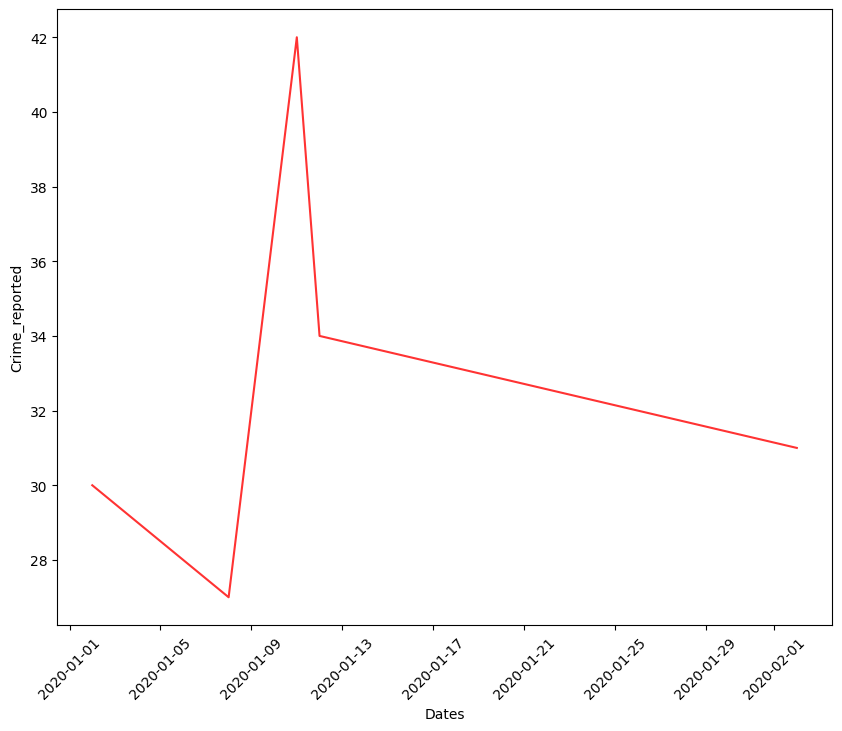

In [7]:
plt.style.use('default')
plt.figure(figsize=(10,8))
plt.plot(crime_date.index,crime_date,color='r',alpha=0.8)
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Crime_reported')

#Conclusion:
From the above graph, we can see the trend line for reported crimes in the year 2020:
- The reported crimes are decreasing from 2020-01-01 to 2020-01-09.
- There is a sudden increase in reported crimes around 2020-01-08.
- From 2020-01-13, they started decreasing gradually.


# 2. Checking where are the geografical hotspots for the reported crime. 

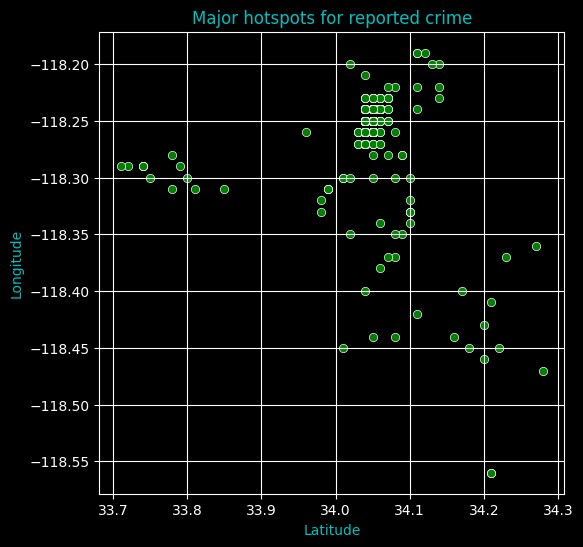

In [8]:
# Utilizing with LAT & LON
plt.style.use('dark_background')
plt.figure(figsize=(6,6))
sns.scatterplot(x=crime_df['LAT'],y=crime_df['LON'],color='green')
plt.xlabel('Latitude',color='c')
plt.ylabel('Longitude',color='c')
plt.title('Major hotspots for reported crime',color='c')
plt.grid(True)

#Conclusion: Area with Longitude(118.30 TO 118.20) and Latitude(34.0 TO 34.15) are the major hotspot for reported crimes.


# 3.Checking what is the distribution of victim ages in reported crime ?


Text(0.5, 1.0, 'Distribution_of_Ages_for_Reported_Crime')

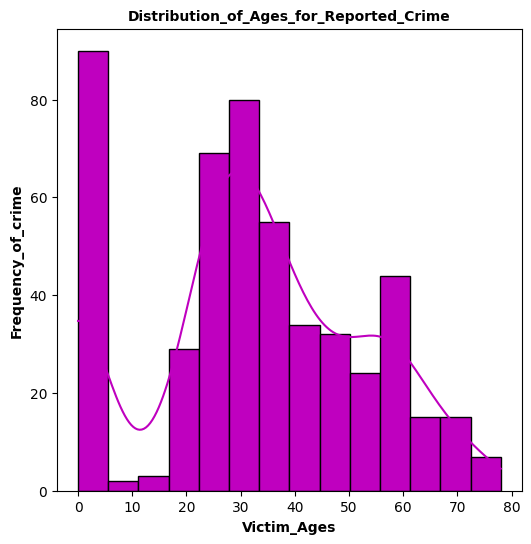

In [8]:
plt.style.use('default')
plt.figure(figsize=(6,6))
sns.histplot(crime_df['Vict_Age'],color='m',kde=True,alpha=1)
plt.xlabel('Victim_Ages',color='black',fontweight='bold',fontsize=10)
plt.ylabel('Frequency_of_crime',color='black',fontweight='bold',fontsize=10)
plt.title('Distribution_of_Ages_for_Reported_Crime',color='black',fontweight='bold',fontsize=10)


#Conclusion: Age group between 18 to 40 are the major victims in the reported crime.

# 4. Lets check what is the significant difference between crime rate of male and female

<Axes: xlabel='Vict_Sex', ylabel='count'>

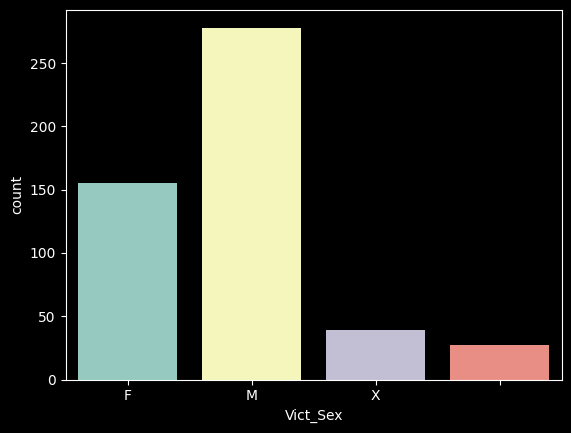

In [12]:
sns.countplot(x=crime_df['Vict_Sex'],hue=crime_df['Vict_Sex'])


#Conclusion: 

    - From the above chart we can say the crime rate for male is quite higher than the female.

    - There are another Vict_sex value X which is not define.

# 5. Where do the most crime occure based on location column ?

In [11]:
top5_locatoin=crime_df['Location'].value_counts()[0:5].keys()
crime_df['Location'].value_counts()[0:5].sort_values(ascending=False)

Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
Name: count, dtype: int64

#From above query's result we can see the location *800 N ALAMEDA* ST has most crime occurrences.
- At second place we have *700 W 7TH ST* followed by *1100 S FIGUEROA ST & 00 E 5TH ST* 

- We can see from the chart as well.

Text(0.5, 1.0, 'Frequency_of_crime_as_per_location')

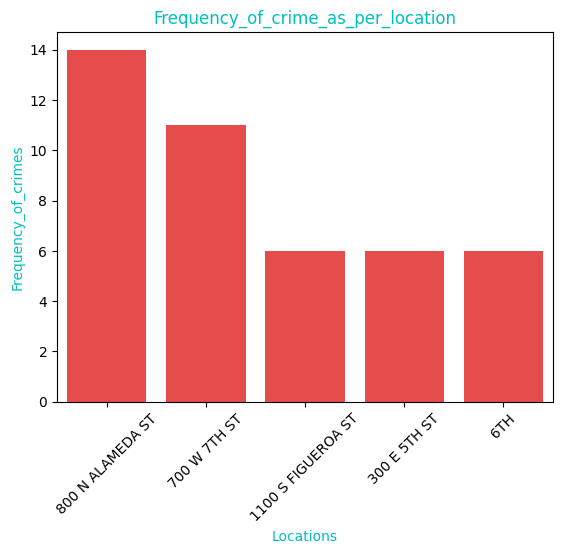

In [17]:
sns.barplot(x=list(crime_df['Location'].value_counts()[0:5].keys()),y=list(crime_df['Location'].value_counts()[0:5]),color='r',alpha=0.8)
plt.xticks(rotation=45)
plt.xlabel('Locations',color='c')
plt.ylabel('Frequency_of_crimes',color='c')
plt.title('Frequency_of_crime_as_per_location',color='c')



# 5. What is the distribution of reported crime based on crime code 

<Axes: xlabel='Crm_Cd', ylabel='Count'>

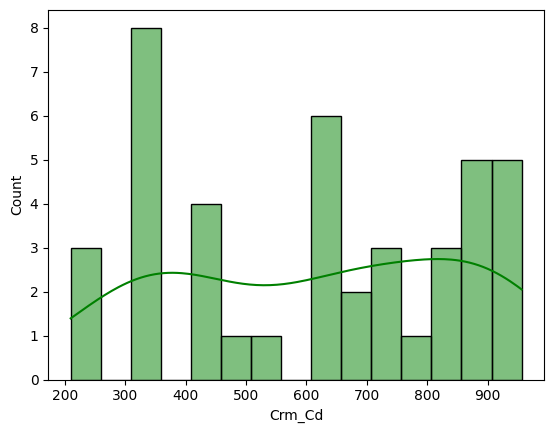

In [95]:
sns.histplot(x=crime_df['Crm_Cd'].value_counts().index,kde=True,color='green',alpha=0.5,bins=15)

In [116]:
# Looking at the descriptions of the crime code reported the most by fetching the data from DB 

qu = 'SELECT* FROM crime_data WHERE Crm_Cd BETWEEN 300 AND 400'
cursor.execute(qu)
data = cursor.fetchall()
print(data)

((200100507, '01-04-2020', '01-04-2020', 'Central', 341, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 23, 'M', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '700 BERNARD ST', 34.07, -118.24), (200100509, '01-04-2020', '01-04-2020', 'Central', 330, 'BURGLARY FROM VEHICLE', 29, 'M', 'STREET', 'IC', '800 N ALAMEDA ST', 34.04, -118.26), (200100514, '01-05-2020', '01-05-2020', 'Central', 341, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 41, 'M', 'HOTEL', 'AA', '700 W 7TH ST', 34.05, -118.26), (200914517, '09-10-2020', '09-09-2020', 'Van Nuys', 354, 'THEFT OF IDENTITY', 40, 'M', 'CONDOMINIUM/TOWNHOUSE', 'IC', '8TH', 34.2, -118.43), (200104020, '01-01-2020', '01-01-2020', 'Central', 350, 'THEFT, PERSON', 44, 'M', 'SIDEWALK', 'IC', '700 ALPINE ST', 34.05, -118.25), (200104035, '01-01-2020', '01-01-2020', 'Central', 310, 'BURGLARY', 34, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '1200 E 7TH ST', 34.06, -118.24), (200104063, '01-01-2020', '01

In [117]:
# Converting to dataframe and adding columns
df= pd.DataFrame(data)

column_names = ['DR_NO','Date_Rptd','DATE_OCC','AREA_NAME','Crm_Cd','Crm_Cd_Desc','Vict_Age',
                'Vict_Sex','Premis_Desc','Status','Location','LAT','LON']
df.columns= column_names


    - Below We can check the description of the crime codes reported max

In [119]:

df[['Crm_Cd','Crm_Cd_Desc']].head(10)

,Crm_Cd,Crm_Cd_Desc
0,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
1,330,BURGLARY FROM VEHICLE
2,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
3,354,THEFT OF IDENTITY
4,350,"THEFT, PERSON"
5,310,BURGLARY
6,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
7,310,BURGLARY
8,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
9,330,BURGLARY FROM VEHICLE


#Conclusion: From the above chart we can see that the frequency of crime code 300 to 400 is quite high as compare to other crime codes. 
    
    - Where as the crime code 600 to 900 are reported quite equally. 
    
    - Crime code 450 to 550 are reported the least.

    - There are total 148 crime out of 499 reported under crime code 300 to 400

In [9]:
# closing database connection 
conn.close()